<a href="https://colab.research.google.com/github/shreyajha-design/Iris-dataset-GDG-AI-ML-/blob/main/Iris_Dataset(AI_ML_task).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = [iris.target_names[i] for i in y]

In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (150, 5)


In [ ]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
print("\nClass distribution:\n", df["species"].value_counts())


Class distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


/tmp/ipython-input-879498520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="species", data=df, palette="Set1")


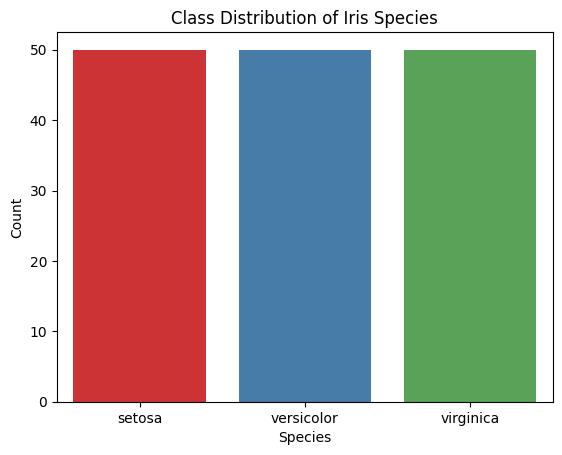

In [ ]:
# Bar plot of class distribution
sns.countplot(x="species", data=df, palette="Set1")
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Class Distribution of Iris Species")
plt.show()

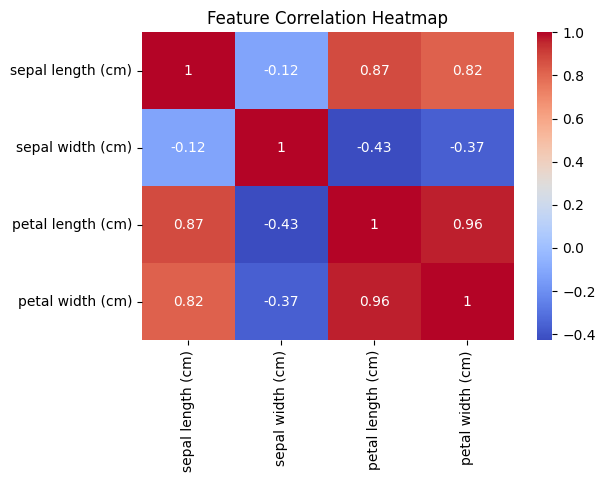

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# -------------------------------
# Utility functions
# -------------------------------
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

# -------------------------------
# Logistic Regression (Softmax)
# -------------------------------
class SoftmaxRegression:
    def __init__(self, learning_rate=0.1, epochs=2000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.W = None
        self.b = None
        self.loss_history = []
        self.accuracy_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        self.W = np.zeros((n_features, n_classes))
        self.b = np.zeros((1, n_classes))
        y_one_hot = one_hot(y, n_classes)

        for epoch in range(self.epochs):
            logits = np.dot(X, self.W) + self.b
            y_pred = softmax(logits)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y_one_hot))
            db = (1 / n_samples) * np.sum(y_pred - y_one_hot, axis=0, keepdims=True)

            self.W -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            # Loss
            loss = -np.mean(np.sum(y_one_hot * np.log(y_pred + 1e-9), axis=1))
            self.loss_history.append(loss)

            # Accuracy
            y_pred_labels = np.argmax(y_pred, axis=1)
            acc = accuracy_score(y, y_pred_labels)
            self.accuracy_history.append(acc)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

    def predict(self, X):
        logits = np.dot(X, self.W) + self.b
        y_pred = softmax(logits)
        return np.argmax(y_pred, axis=1)

Epoch 0, Loss: 1.0986, Accuracy: 0.3333
Epoch 100, Loss: 0.2114, Accuracy: 0.9500
Epoch 200, Loss: 0.1510, Accuracy: 0.9583
Epoch 300, Loss: 0.1232, Accuracy: 0.9667
Epoch 400, Loss: 0.1072, Accuracy: 0.9667
Epoch 500, Loss: 0.0968, Accuracy: 0.9750
Epoch 600, Loss: 0.0894, Accuracy: 0.9750
Epoch 700, Loss: 0.0838, Accuracy: 0.9750
Epoch 800, Loss: 0.0795, Accuracy: 0.9750
Epoch 900, Loss: 0.0760, Accuracy: 0.9750

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



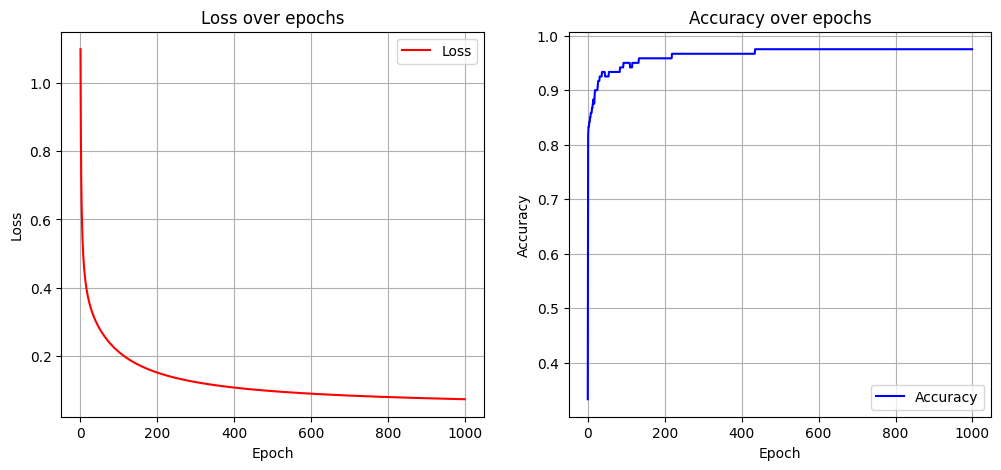

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Softmax Regression
model = SoftmaxRegression(learning_rate=0.3, epochs=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# ================================
# Plot Loss and Accuracy
# ================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model.loss_history, label="Loss", color="red")
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model.accuracy_history, label="Accuracy", color="blue")
plt.title("Accuracy over epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.show()